In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [3]:
df = pd.read_csv('/content/Mall_Customers.csv')
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
print(X.head())

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

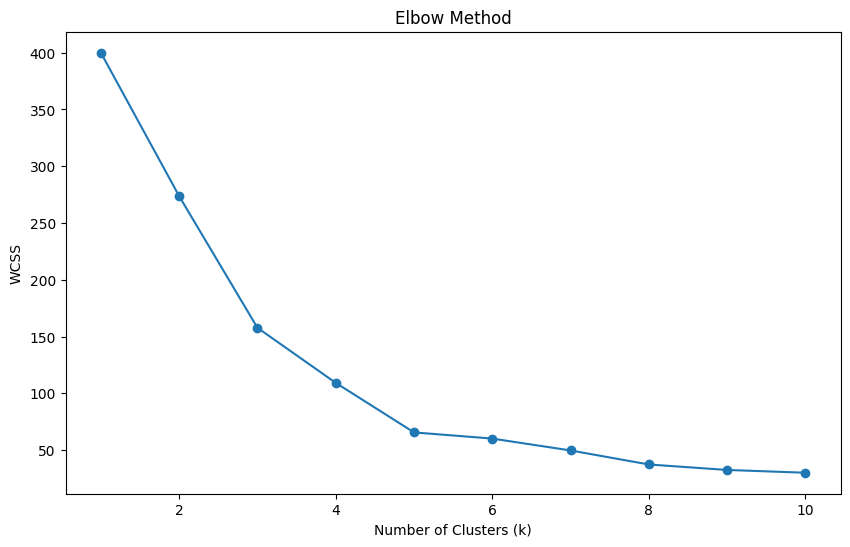

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [8]:
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [9]:
df['cluster'] = clusters

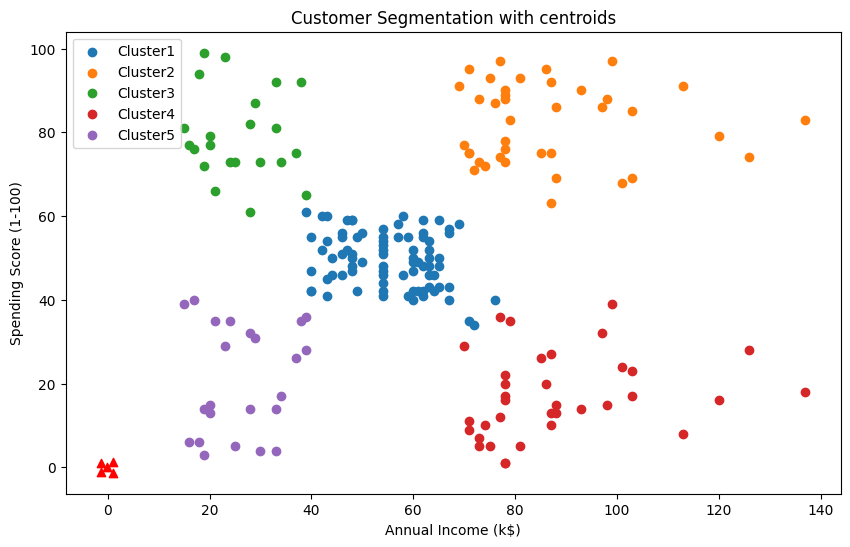

In [11]:
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.scatter(df[df['cluster'] == i]['Annual Income (k$)'], df[df['cluster'] == i]['Spending Score (1-100)'], label='Cluster'+str(i+1))
    plt.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], marker='^', c= 'red')
plt.title('Customer Segmentation with centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

df.to_csv('customer_segmentation.csv', index=False)
